<a href="https://colab.research.google.com/github/GuilhermeVCCdaSilva/Couchbase-VS-Postgres/blob/main/CouchbasevsPostgres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benchmark Test: Couchbase vs. Postgres JSON

This is a simple benchmark test comparing Couchbase (NoSQL) and Postgres (JSON) to evaluate their write and read throughput.

## Test Steps:

1. **Write**: Create 100 documents.
2. **Read**: Retrieve the 100 documents (that have been previously written).

## Test Iterations:

The test was conducted for 10 iterations for each database.

## Output:

The results of each iteration are recorded in a CSV file.

In [ ]:
# Installing required packages
!pip install pandas
!pip install matplotlib

In [ ]:
!curl https://raw.githubusercontent.com/GuilhermeVCCdaSilva/Couchbase-VS-Postgres/main/bentchmarkCouchBase.csv > bentchmarkCouchBase.csv
!curl https://raw.githubusercontent.com/GuilhermeVCCdaSilva/Couchbase-VS-Postgres/main/bentchmarkPostgres.csv > bentchmarkPostgres.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   435  100   435    0     0   2852      0 --:--:-- --:--:-- --:--:--  2843
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   428  100   428    0     0   2728      0 --:--:-- --:--:-- --:--:--  2743


In [ ]:
import pandas as pd

couch_df = pd.read_csv("bentchmarkCouchBase.csv")
postgres_df = pd.read_csv("bentchmarkPostgres.csv")

In [ ]:
couch_df

,Iteration,Couchbase_Insert,Couchbase_Select
0,1,2.328147,8.307989
1,2,2.326603,15.881110
2,3,3.906313,27.123770
3,4,2.408064,24.583335
4,5,2.521032,29.839137
5,6,2.442131,33.471104
6,7,2.444896,37.325350
7,8,2.411729,42.000128
8,9,2.466387,46.263503
9,10,2.446562,50.438289


In [ ]:
postgres_df

,Iteration,Postgres_Insert,Postgres_Select
0,1,2.792129,48.788085
1,2,2.865448,94.787054
2,3,2.886079,141.499630
3,4,2.945235,188.477700
4,5,2.889527,234.764574
5,6,2.863609,281.562124
6,7,2.882996,391.814789
7,8,2.886545,376.025851
8,9,2.878036,430.154392
9,10,5.187033,521.397949


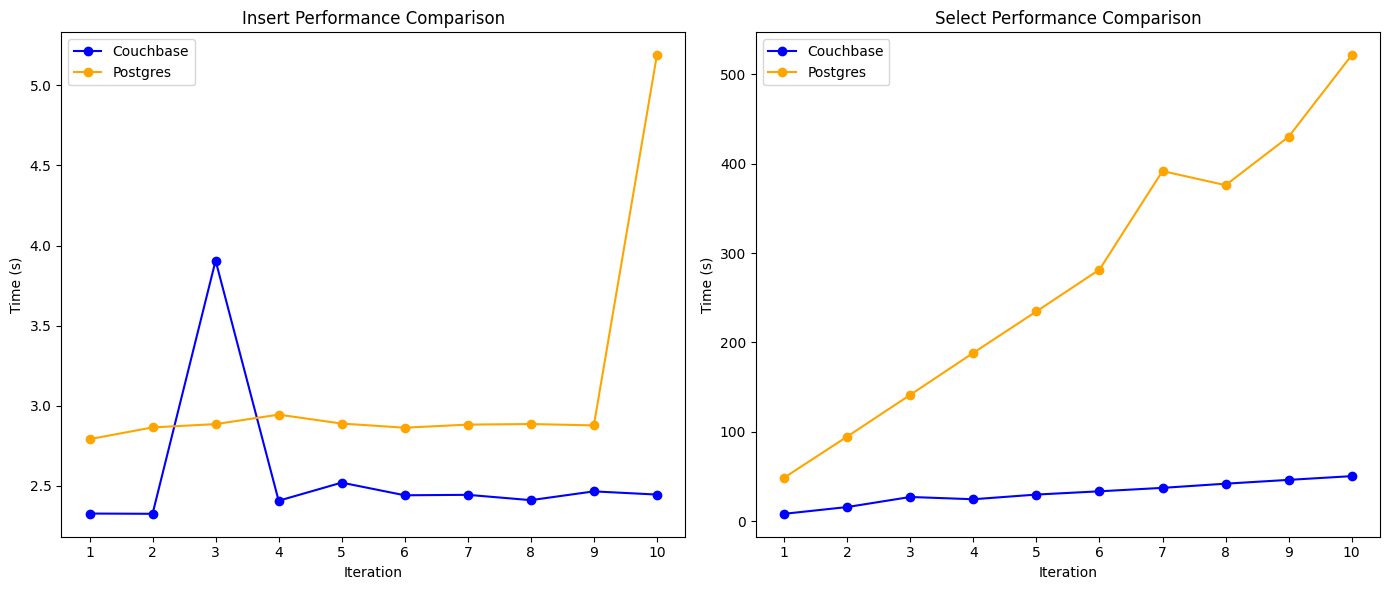

In [ ]:
import matplotlib.pyplot as plt


couch_iterations = couch_df['Iteration']
postgres_iterations = postgres_df['Iteration']

couch_insert = couch_df['Couchbase_Insert']
postgres_insert = postgres_df['Postgres_Insert']

couch_select = couch_df['Couchbase_Select']
postgres_select = postgres_df['Postgres_Select']

# Plotting the comparison for Inserts
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(couch_iterations, couch_insert, label='Couchbase', marker='o', color='blue')
plt.plot(postgres_iterations, postgres_insert, label='Postgres', marker='o', color='orange')
plt.title('Insert Performance Comparison')
plt.xlabel('Iteration')
plt.ylabel('Time (s)')
plt.xticks(couch_iterations)
plt.legend()

# Plotting the comparison for Selects
plt.subplot(1, 2, 2)
plt.plot(couch_iterations, couch_select, label='Couchbase', marker='o', color='blue')
plt.plot(postgres_iterations, postgres_select, label='Postgres', marker='o', color='orange')
plt.title('Select Performance Comparison')
plt.xlabel('Iteration')
plt.ylabel('Time (s)')
plt.xticks(couch_iterations)
plt.legend()

plt.tight_layout()
plt.show()